# Genotype Differenciation

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings

import pandas as pd

import statsmodels.api as sm

from matplotlib.figure import Figure
import seaborn as sns
import panel as pn

import com_const as cc
import com_func as cf
import leaf_patch_gen_diff as lpgd

## Setup

In [3]:
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)

In [4]:
pd.set_option("display.max_colwidth", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)
pd.set_option("display.max_rows", 20)

In [5]:
sns.set_style("whitegrid")

In [6]:
pn.extension("ipywidgets", "plotly", design="material")

## Load Data

In [7]:
df = cf.read_dataframe(
    path=cc.path_to_data.joinpath("genotype_differenciation_dataset.csv")
).assign(exp=lambda s: s.experiment + s.inoc.astype(str))
df

experiment  inoc    gen                  cpm  plaque                        file_name  dpi  col row  oiv  p_oiv         exp
0    Exp23DM08     2  1272s  hyb.50025.col.1272s      49  Exp23DM08_inoc2_T0_P049_a_4.png    0    4   a    9      9  Exp23DM082
1    Exp23DM08     2  1272s  hyb.50025.col.1272s      49  Exp23DM08_inoc2_T3_P049_a_4.png    3    4   a    9      9  Exp23DM082
2    Exp23DM08     2  1272s  hyb.50025.col.1272s      49  Exp23DM08_inoc2_T4_P049_a_4.png    4    4   a    7      7  Exp23DM082
3    Exp23DM08     2  1272s  hyb.50025.col.1272s      49  Exp23DM08_inoc2_T5_P049_a_4.png    5    4   a    3      3  Exp23DM082
4    Exp23DM08     2  1272s  hyb.50025.col.1272s      49  Exp23DM08_inoc2_T6_P049_a_4.png    6    4   a    3      3  Exp23DM082
..         ...   ...    ...                  ...     ...                              ...  ...  ...  ..  ...    ...         ...
565  Exp23DM09     2  1479s  hyb.50025.col.1479s      61  Exp23DM09_inoc2_T0_P061_c_2.png    0    2   c    9      9  Exp23DM092
566  Exp23DM09     2  1479s  hyb.50025.col.1479s      61  Exp23DM09_inoc2_T3_P061_c_2.png    3    2   c    9      7  Exp23DM092
567  Exp23DM09     2  1479s  hyb.50025.col.1479s      61  Exp23DM09_inoc2_T4_P061_c_2.png    4    2   c    7      7  Exp23DM092
568  Exp23DM09     2  1479s  hyb.50025.col.1479s      61  Exp23DM09_inoc2_T5_P061_c_2.png    5    2   c    7      7  Exp23DM092
569  Exp23DM09     2  1479s  hyb.50025.col.1479s      61  Exp23DM09_inoc2_T6_P061_c_2.png    6    2   c    7      7  Exp23DM092

[570 rows x 12 columns]

In [8]:
df_dpi_6 = df[df.dpi == 6]
df_dpi_6

experiment  inoc    gen                  cpm  plaque                        file_name  dpi  col row  oiv  p_oiv         exp
4    Exp23DM08     2  1272s  hyb.50025.col.1272s      49  Exp23DM08_inoc2_T6_P049_a_4.png    6    4   a    3      3  Exp23DM082
9    Exp23DM08     2  1272s  hyb.50025.col.1272s      53  Exp23DM08_inoc2_T6_P053_a_1.png    6    1   a    3      3  Exp23DM082
14   Exp23DM08     2  1272s  hyb.50025.col.1272s      55  Exp23DM08_inoc2_T6_P055_b_1.png    6    1   b    1      1  Exp23DM082
19   Exp23DM08     2  1272s  hyb.50025.col.1272s      53  Exp23DM08_inoc2_T6_P053_b_4.png    6    4   b    1      1  Exp23DM082
24   Exp23DM08     2  1282s  hyb.50025.col.1282s      49  Exp23DM08_inoc2_T6_P049_c_2.png    6    2   c    7      7  Exp23DM082
..         ...   ...    ...                  ...     ...                              ...  ...  ...  ..  ...    ...         ...
549  Exp23DM09     2  1479s  hyb.50025.col.1479s      58  Exp23DM09_inoc2_T6_P058_b_2.png    6    2   b    7      7  Exp23DM092
554  Exp23DM09     1  1479s  hyb.50025.col.1479s      59  Exp23DM09_inoc1_T6_P059_b_1.png    6    1   b    7      7  Exp23DM091
559  Exp23DM09     2  1479s  hyb.50025.col.1479s      59  Exp23DM09_inoc2_T6_P059_b_1.png    6    1   b    7      7  Exp23DM092
564  Exp23DM09     1  1479s  hyb.50025.col.1479s      61  Exp23DM09_inoc1_T6_P061_c_2.png    6    2   c    7      7  Exp23DM091
569  Exp23DM09     2  1479s  hyb.50025.col.1479s      61  Exp23DM09_inoc2_T6_P061_c_2.png    6    2   c    7      7  Exp23DM092

[114 rows x 12 columns]

## Visualizations

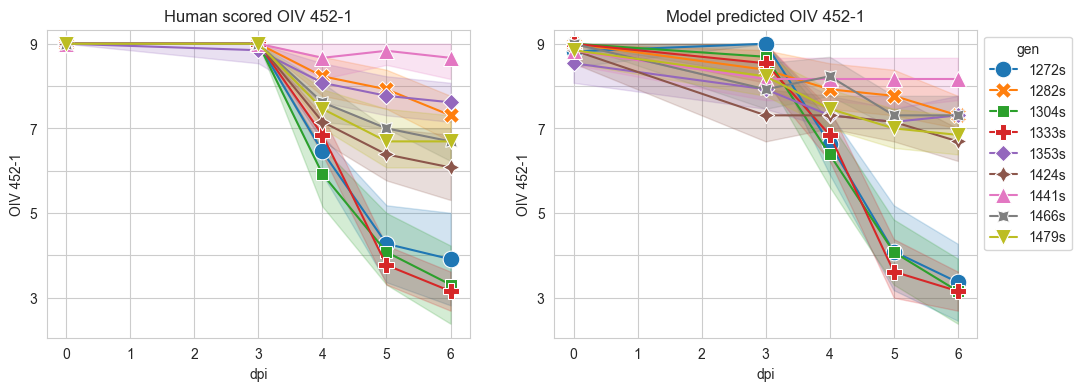

In [9]:
fig = Figure(figsize=(12, 4))
ax_oiv, ax_p_oiv = fig.subplots(nrows=1, ncols=2)

full_oiv = "OIV 452-1"
df_oiv = df.copy()
df_oiv[full_oiv] = df_oiv.oiv
df_p_oiv = df.copy()
df_p_oiv[full_oiv] = df_p_oiv.p_oiv

var = "gen"

lpgd.plot_single_progression(
    ax=ax_oiv, df=df_oiv, target=full_oiv, title="Human scored OIV 452-1"
)

lpgd.plot_single_progression(
    ax=ax_p_oiv,
    df=df_p_oiv,
    target=full_oiv,
    title="Model predicted OIV 452-1",
    show_legend=True,
)

fig

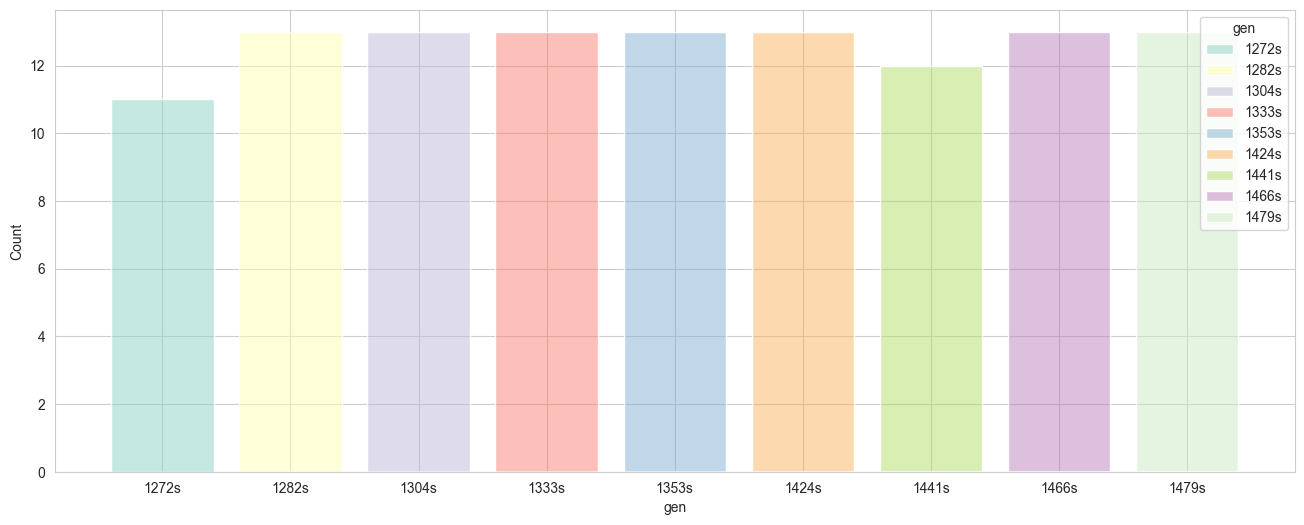

In [10]:
fig = Figure(figsize=(16, 6))
sns.histplot(
    df_dpi_6.sort_values("gen"),
    x="gen",
    hue="gen",
    shrink=0.8,
    ax=fig.subplots(1, 1),
)

fig

## ANOVA

In [11]:
rpv_formula = f"~ C(gen) + C(exp) + C(exp):C(gen)"

In [12]:
(
    pd.concat(
        [
            sm.stats.anova_lm(
                lpgd.get_model(df=df, target="oiv", dpi=i, formula=rpv_formula)
            ).assign(dpi=i)
            for i in sorted(list(df.dpi.unique()))
        ]
    )
    .reset_index()
    .set_index("dpi")
    .drop(
        ["df", "sum_sq", "mean_sq"],
        axis=1,
    )
    .query("index != 'Residual'")
    .query("index != 'C(exp)'")
    .rename(columns={"index": "source of variation"})
    .replace("C(gen)", "genotype (between)")
    .replace("C(exp):C(gen)", "interaction genotype/experiment")
    .reset_index()
)

dpi              source of variation          F        PR(>F)
0    0               genotype (between)   1.133286  3.493874e-01
1    0  interaction genotype/experiment   0.152174  9.999372e-01
2    3               genotype (between)   0.988192  4.509143e-01
3    3  interaction genotype/experiment   1.111100  3.579007e-01
4    4               genotype (between)  11.071070  1.171819e-10
5    4  interaction genotype/experiment   2.037709  1.894190e-02
6    5               genotype (between)  39.112711  1.170367e-25
7    5  interaction genotype/experiment   1.809700  4.231800e-02
8    6               genotype (between)  35.122565  4.064701e-24
9    6  interaction genotype/experiment   1.419331  1.516602e-01

In [13]:
df_dpi_6.groupby("gen").agg(
    {"oiv": ["mean", "std"], "p_oiv": ["mean", "std"]}
).reset_index()

gen       oiv               p_oiv          
              mean       std      mean       std
0  1272s  3.909091  2.071451  3.363636  1.501514
1  1282s  7.307692  1.109400  7.307692  0.751068
2  1304s  3.307692  1.797434  3.153846  1.519109
3  1333s  3.153846  0.987096  3.153846  0.987096
4  1353s  7.615385  0.960769  7.307692  0.751068
5  1424s  6.076923  1.552500  6.692308  0.751068
6  1441s  8.666667  0.778499  8.166667  1.029857
7  1466s  6.692308  0.751068  7.307692  0.751068
8  1479s  6.692308  1.377474  6.846154  0.987096

In [14]:
pn.GridBox(
    pn.Column(
        pn.pane.Markdown("### Annotated"),
        lpgd.anova_table(
            sm.stats.anova_lm(
                lpgd.get_model(df=df_dpi_6, target="oiv", dpi=6, formula=rpv_formula),
                typ=2,
            )
        ),
    ),
    pn.Column(
        pn.pane.Markdown("### Predicted"),
        lpgd.anova_table(
            sm.stats.anova_lm(
                lpgd.get_model(df=df_dpi_6, target="p_oiv", dpi=6, formula=rpv_formula),
                typ=2,
            )
        ),
    ),
    ncols=2,
)

GridBox(design=<class 'panel.theme.materi..., ncols=2)
    [0] Column(design=<class 'panel.theme.materi...)
        [0] Markdown(str, design=<class 'panel.theme.materi...)
        [1] DataFrame(DataFrame, design=<class 'panel.theme.materi...)
    [1] Column(design=<class 'panel.theme.materi...)
        [0] Markdown(str, design=<class 'panel.theme.materi...)
        [1] DataFrame(DataFrame, design=<class 'panel.theme.materi...)

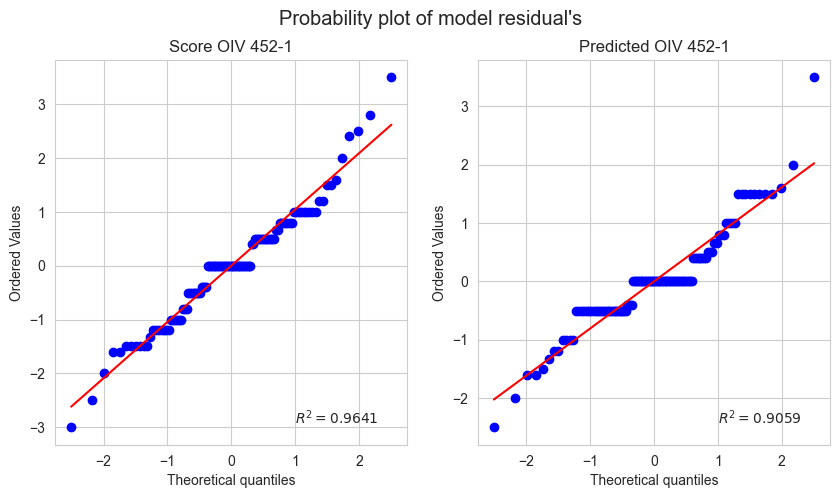

In [15]:
lpgd.plot_assumptions(
    models=[
        lpgd.get_model(df=df_dpi_6, target="oiv", dpi=6, formula=rpv_formula),
        lpgd.get_model(df=df_dpi_6, target="p_oiv", dpi=6, formula=rpv_formula),
    ],
    titles=["Score OIV 452-1", "Predicted OIV 452-1"],
    figsize=(10, 5),
)

# Tukey HSD

In [16]:
dft = lpgd.get_tuckey_compare(df=df_dpi_6, groups="gen", df_genotypes=None)
dft.style.apply(lpgd.hghlight_rejection, axis=None)

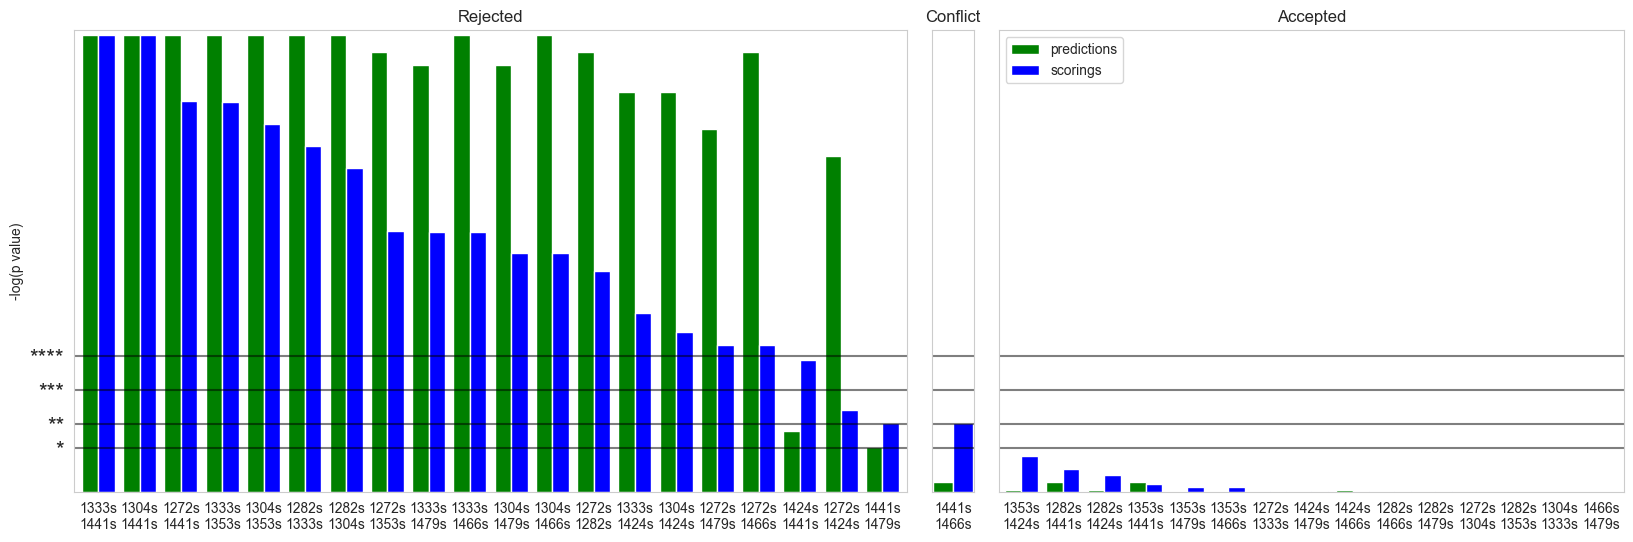

In [17]:
lpgd.df_tukey_cmp_plot(df=df_dpi_6, groups="gen")

In [18]:
df_cmp_means = (
    (df_dpi_6[df_dpi_6.gen.isin(["1441s", "1466s"])])
    .groupby("gen")
    .agg({"oiv": ["mean", "std"], "p_oiv": ["mean", "std"]})
    .reset_index()
)
df_cmp_means["difference"] = df_cmp_means.oiv["mean"] - df_cmp_means.p_oiv["mean"]
df_cmp_means

gen       oiv               p_oiv           difference
              mean       std      mean       std           
0  1441s  8.666667  0.778499  8.166667  1.029857   0.500000
1  1466s  6.692308  0.751068  7.307692  0.751068  -0.615385

GridBox(design=<class 'panel.theme.materi..., ncols=3)
    [0] Column(design=<class 'panel.theme.materi...)
        [0] Markdown(str, design=<class 'panel.theme.materi...)
        [1] Image(Image, design=<class 'panel.theme.materi...)
    [1] Column(design=<class 'panel.theme.materi...)
        [0] Markdown(str, design=<class 'panel.theme.materi...)
        [1] Image(Image, design=<class 'panel.theme.materi...)
    [2] Column(design=<class 'panel.theme.materi...)
        [0] Markdown(str, design=<class 'panel.theme.materi...)
        [1] Image(Image, design=<class 'panel.theme.materi...)
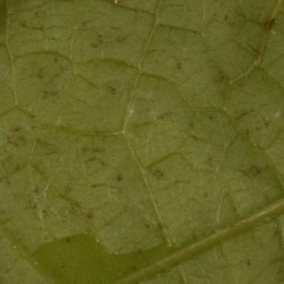
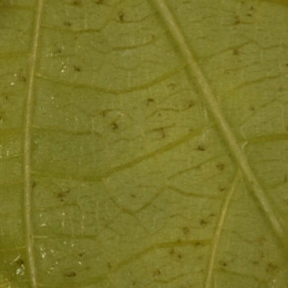
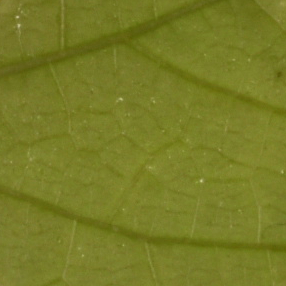

In [19]:
lpgd.plot_patches(df_dpi_6[df_dpi_6.gen.isin(["1441s"])], diff_only=True)

GridBox(design=<class 'panel.theme.materi..., ncols=4)
    [0] Column(design=<class 'panel.theme.materi...)
        [0] Markdown(str, design=<class 'panel.theme.materi...)
        [1] Image(Image, design=<class 'panel.theme.materi...)
    [1] Column(design=<class 'panel.theme.materi...)
        [0] Markdown(str, design=<class 'panel.theme.materi...)
        [1] Image(Image, design=<class 'panel.theme.materi...)
    [2] Column(design=<class 'panel.theme.materi...)
        [0] Markdown(str, design=<class 'panel.theme.materi...)
        [1] Image(Image, design=<class 'panel.theme.materi...)
    [3] Column(design=<class 'panel.theme.materi...)
        [0] Markdown(str, design=<class 'panel.theme.materi...)
        [1] Image(Image, design=<class 'panel.theme.materi...)
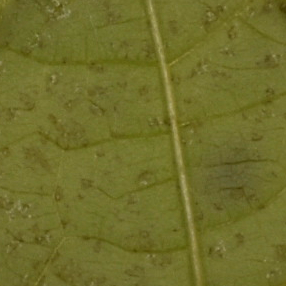
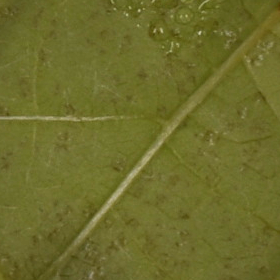
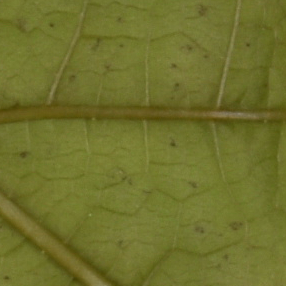
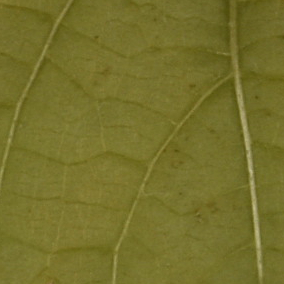

In [20]:
lpgd.plot_patches(df_dpi_6[df_dpi_6.gen.isin(["1466s"])], diff_only=True)